In [17]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [18]:
!wget -O imagedata.csv https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv

--2020-01-18 09:58:15--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/imagedata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1776 (1.7K) [text/plain]
Saving to: ‘imagedata.csv’

100%[======================================>] 1,776       --.-K/s   in 0s      

2020-01-18 09:58:15 (28.6 MB/s) - ‘imagedata.csv’ saved [1776/1776]



In [19]:
!wget -O images.zip https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip

--2020-01-18 09:58:16--  https://raw.githubusercontent.com/shitalajagekar/DataScience/master/images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1828109 (1.7M) [application/zip]
Saving to: ‘images.zip’

100%[======================================>] 1,828,109   --.-K/s   in 0.06s   

2020-01-18 09:58:16 (28.0 MB/s) - ‘images.zip’ saved [1828109/1828109]



In [31]:
from zipfile import ZipFile

image = ZipFile('images.zip')
image.extractall('images')


In [32]:
!ls

imagedata.csv  images  images.zip


In [33]:
import pandas as pd
df=pd.read_csv("imagedata.csv")

In [34]:
df.head()

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg


In [35]:

df[df.path != 'a7.jpg']

,label,path
0,0,a1.jpg
1,0,a2.jpg
2,0,a3.jpg
3,0,a4.jpg
4,0,a5.jpg
5,0,a6.jpg
7,1,b1.jpg
8,1,b2.jpg
9,1,b3.jpg
10,1,b4.jpg


In [36]:
import os
os.listdir("images/images")

['j3.jpg',
 'e6.jpg',
 'p7.jpg',
 'r5.jpg',
 'b2.jpg',
 'q2.jpg',
 'o1.jpg',
 'q3.jpg',
 'b5.jpg',
 'u3.jpg',
 'o7.jpg',
 'h3.jpg',
 's5.jpg',
 'r2.jpg',
 'q6.jpg',
 'c8.jpg',
 'b6.jpg',
 'g2.jpg',
 'h1.jpg',
 'r1.jpg',
 'k7.jpg',
 'f7.jpg',
 'o4.jpg',
 'a5.jpg',
 'c5.jpg',
 'q5.jpg',
 'n4.jpg',
 'i3.jpg',
 'p4.jpg',
 's2.jpg',
 'z4.jpg',
 'z5.jpg',
 'l1.jpg',
 'g3.jpg',
 'i6.jpg',
 'e2.jpg',
 'e7.jpg',
 'h7.jpg',
 'o6.jpg',
 'm2.jpg',
 'm6.jpg',
 'h5.jpg',
 'w3.jpg',
 'f3.jpg',
 'a7.jpg',
 't3.jpg',
 'g5.jpg',
 'n2.jpg',
 'h6.jpg',
 'k2.jpg',
 'y1.jpg',
 'r6.jpg',
 'v5.jpg',
 'x2.jpg',
 'c1.jpg',
 'h4.jpg',
 'f1.jpg',
 'b3.jpg',
 'g7.jpg',
 'e4.jpg',
 'w5.jpg',
 'p3.jpg',
 'o5.jpg',
 'y3.jpg',
 'l5.jpg',
 'h2.jpg',
 'j2.jpg',
 'j7.jpg',
 'l3.jpg',
 'm4.jpg',
 'm3.jpg',
 'v1.jpg',
 'k4.jpg',
 'd3.jpg',
 'b4.jpg',
 'i5.jpg',
 'd4.jpg',
 'n5.jpg',
 'z3.jpg',
 'e1.jpg',
 'k6.jpg',
 'l6.jpg',
 'c7.jpg',
 'r3.jpg',
 'a3.jpg',
 't2.jpg',
 'n3.jpg',
 'q1.jpg',
 'j1.jpg',
 'l7.jpg',
 'v3.jpg',

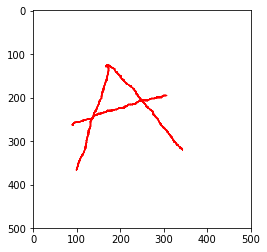

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/images/a1.jpg')

plt.imshow(img, cmap='gray')

In [38]:

image_path = df["path"].tolist()

In [39]:
train_image = []
for image_name in image_path:
    img = image.load_img('images/images/'+image_name, target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255 # Normalization
    train_image.append(img)
X = np.array(train_image)

AttributeError: 'ZipFile' object has no attribute 'load_img'

In [ ]:
y = df['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

In [ ]:
tf.compat.v1.enable_eager_execution()


In [ ]:
from sklearn.externals import joblib 

joblib.dump(model, 'character_reg.pkl')

In [ ]:
img = image.load_img('images/'+"d7.jpg", target_size=(28,28,1), grayscale=True)
img = image.img_to_array(img)
img = img/255
model.predict_classes([[img]])

In [ ]:
plt.imshow(img, cmap=plt.get_cmap('gray'))